#### Метод простых итераций

Функции для тестирования: 

$f(x)=x^{3} - x^{2}-9x + 9$ - исходная функция, для которой требуется найти корни уравнения $f(x)=0$

In [42]:
def f(x):
    return x**3 - x ** 2 - 9 * x + 9

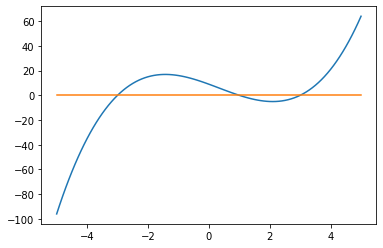

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 101)
y0 = np.zeros(len(x))
y = f(x)
plt.plot(x,y)
plt.plot(x,y0)

Метод отделения корней или графический способ позволяют установить отрезки, на которых существует один единственный корень:  $[-4;-2]$, $[0,5;2]$, $[2;4]$

$\phi(x)$ - функция для метода простых итераций, такая что $f(x)=0 \Longleftrightarrow \phi(x)=x$

Для сходимости требуем, чтобы в окрестности корня $|\phi′(x)|<1$

Функция $\phi(x)= \sqrt[3]{x^2+9x-9}$ удовлетворяет условию $|\varphi'(x)|\lt 1$ на отрезках $[2;4]$ и $[-4;-2]$ .

Функция $\phi(x)=\frac{x^3}{9}-\frac{x^2}{9}+1$ удовлетворяет условию $|\varphi'(x)|\lt 1$ на отрезке $[0,5;2]$ ф. 

In [57]:

def phi_1(x):
    # return f(x) / g(x) + x
    value = x ** 2  + 9 * x - 9
    return np.sign(value) * np.abs(value) ** (1.0 / 3.0)

def phi_2(x):
    # return f(x) / g(x) + x
    return (x ** 3 - x ** 2 + 9) / 9

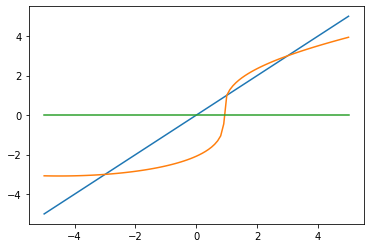

In [50]:
plt.plot(x,x)
plt.plot(x,phi_1(x))
plt.plot(x,y0)

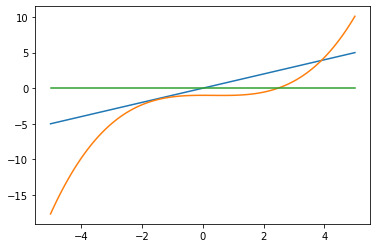

In [51]:
plt.plot(x,x)
plt.plot(x,phi_2(x))
plt.plot(x,y0)

In [58]:
def solve_it(x, eps):
    data = []   
    y = 1
    while abs(y) > eps:        
        y = f(x)
        data.append([x, y])       
        x = phi_1(x)
    return data

res = solve_it(4, 1e-5)
len(res), res[-1]

(25, [3.000000600135663, 7.20163083656189e-06])

In [59]:
res = solve_it(-2, 1e-5)
len(res), res[-1]

(8, [-2.999999686632409, 7.52082119959141e-06])

In [60]:
def solve_it(x, eps):
    data = []   
    y = 1
    while abs(y) > eps:        
        y = f(x)
        data.append([x, y])       
        x = phi_2(x)
    return data

res = solve_it(0.5, 1e-5)
len(res), res[-1]

(7, [0.9999997720497791, 1.823601870398761e-06])